In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import AutoTokenizer, AutoModelWithLMHead, T5Tokenizer, PreTrainedTokenizerFast, DistilBertTokenizerFast,AutoModelForSequenceClassification, pipeline
import shap
import scipy as sp
import nlp
import torch
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("max_rows", None)
from wordcloud import WordCloud

In [2]:
train, test = nlp.load_dataset("emo", split = ["train", "test"])

In [3]:
id2label = {0: 'others', 1: 'happy', 2: 'sad', 3: 'angry'}

In [5]:
data={'text':[],
     'emotion':[]}
for val in train:
    if id2label[val['label']]!='others':
        data['text'].append(val['text'])
        data['emotion'].append(id2label[val['label']])
        
data = pd.DataFrame(data)

In [6]:
tokenizer = AutoTokenizer.from_pretrained("lordtt13/emo-mobilebert",use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained("lordtt13/emo-mobilebert").cuda()

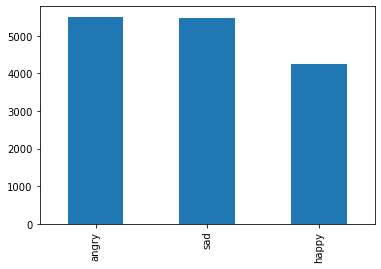

In [7]:
ax = data.emotion.value_counts().plot.bar()


In [8]:
data[800:850]

,text,emotion
800,no no i don't hate anyone now why wow amazing question,happy
801,but takae but what some times ur msgs will hurt some one,sad
802,u call again i talk u nahi am fine i have stopped for now it's alright now d not talk to me,angry
803,my girlfriend is offline she seems like a very nice person,sad
804,i'm not believe you again i don't know why you are not sand me you unmber or phto i don't know but u should believe me don't lie to me ooo do you have africa boyfriend tell me now,angry
805,thank you dear most welcome you're very sweet,happy
806,i'm crushed what happened hug i can't handle the mental abuse,sad
807,didn't got another sneeze no thats the problem i can't sneeze because you don't have nose facewithtearsofjoy,happy
808,i would have appreciated that if someone in real life would have said that to me i took them myself i really feel like crying,sad
809,i'm an engineering student must be an engineering student they said it i comment disappointedface,sad


### Define function

In [9]:
def f(x):
    tv = torch.tensor([tokenizer.encode(v, pad_to_max_length=True, max_length=128,truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores) 
    return val

In [10]:
explainer = shap.Explainer(f,tokenizer)

In [11]:
shap_values_multiclass = explainer(data['text'][800:900])

Partition explainer: 101it [01:02,  1.62it/s]


In [13]:
shap_values_multiclass[0].shape

(15, 4)

In [18]:
happy_index = 1
sad_index = 2
angry_index = 3 

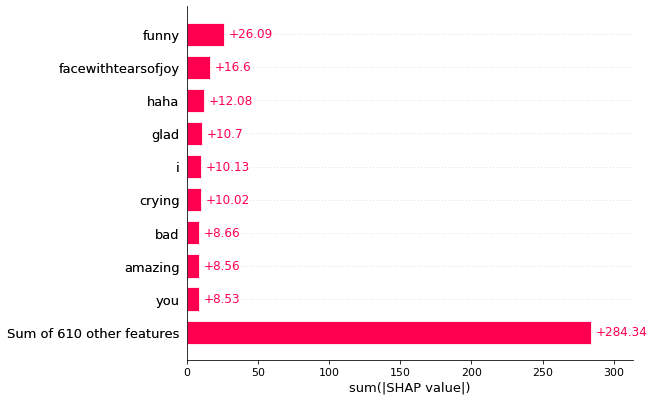

In [31]:
shap.plots.bar(shap_values_multiclass.abs.sum(0),output_index=happy_index)

In [32]:
shap.plots.text(shap_values_multiclass[10],output_index=happy_index)